/home/ardie85/PHD/Research/code/.venv/lib/python3.10/site-packages/gym/wrappers/monitoring/video_recorder.py:9: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils.spawn


Episode: 1, Reward: -100
Episode: 2, Reward: -100
Episode: 3, Reward: -100
Episode: 4, Reward: -100
Episode: 5, Reward: -100
Episode: 6, Reward: -100
Episode: 7, Reward: -100
Episode: 8, Reward: 100
Episode: 9, Reward: 100
Episode: 10, Reward: 100
Episode: 11, Reward: 100
Episode: 12, Reward: -100
Episode: 13, Reward: 100
Episode: 14, Reward: 100
Episode: 15, Reward: 100
Episode: 16, Reward: 100
Episode: 17, Reward: 100
Episode: 18, Reward: 100
Episode: 19, Reward: 100
Episode: 20, Reward: 100
Episode: 21, Reward: 100
Episode: 22, Reward: 100
Episode: 23, Reward: 100
Episode: 24, Reward: 100
Episode: 25, Reward: 100
Episode: 26, Reward: 100
Episode: 27, Reward: 100
Episode: 28, Reward: 100
Episode: 29, Reward: 100
Episode: 30, Reward: 100
Episode: 31, Reward: 100
Episode: 32, Reward: 100
Episode: 33, Reward: 100
Episode: 34, Reward: 100
Episode: 35, Reward: 100
Episode: 36, Reward: 100
Episode: 37, Reward: 100
Episode: 38, Reward: 100
Episode: 39, Reward: -100
Episode: 40, Reward: 100


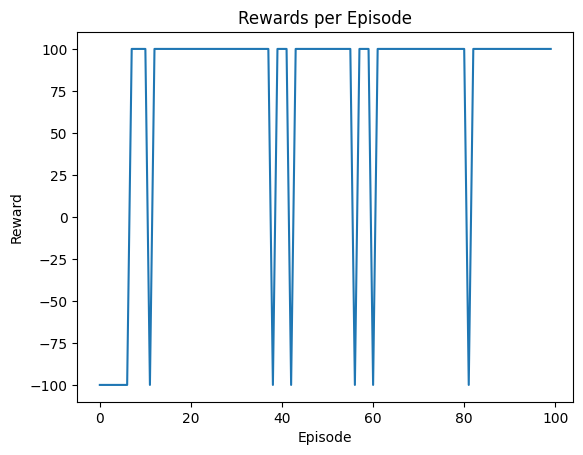

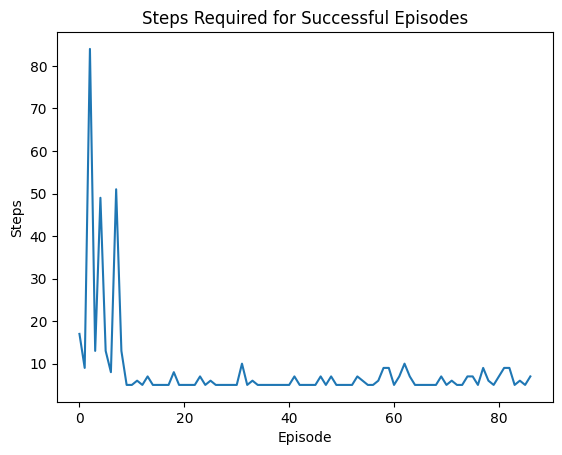

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import gym
from collections import defaultdict
from environment_static import Env

class QLearningAgent:
    def __init__(self, env, actions):
        self.env = env
        self.actions = actions
        self.learning_rate = 0.01
        self.discount_factor = 0.9
        self.epsilon = 0.1
        self.q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
        self.rewards_per_episode = []

    def learn(self, state, action, reward, next_state, next_action):
        current_q = self.q_table[state][action]
        max_next_q = max(self.q_table[next_state])
        new_q = (current_q + self.learning_rate *
                (reward + self.discount_factor * max_next_q - current_q))
        self.q_table[state][action] = new_q

    def get_action(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state_action = self.q_table[state]
            action = self.arg_max(state_action)
        return action

    @staticmethod
    def arg_max(state_action):
        max_index_list = []
        max_value = state_action[0]
        for index, value in enumerate(state_action):
            if value > max_value:
                max_index_list.clear()
                max_value = value
                max_index_list.append(index)
            elif value == max_value:
                max_index_list.append(index)
        return random.choice(max_index_list)

    def run_episodes(self, env, num_episodes):
        env = env
        success_count = 0
        success_steps = []
        
        for episode in range(num_episodes):
            state = env.reset()
            action = self.get_action(str(state))
            total_reward = 0
            step_count = 0

            while True:
                next_state, reward, done = env.step(action)
                next_action = self.get_action(str(next_state))
                self.learn(str(state), action, reward, str(next_state), next_action)
                total_reward += reward
                state = next_state
                action = next_action

                if done:
                    self.rewards_per_episode.append(total_reward)
                    if total_reward > 0:
                        success_count += 1
                        success_steps.append(step_count)
                    print(f"Episode: {episode + 1}, Reward: {total_reward}")
                    break
                
                step_count += 1

        success_rate = success_count / num_episodes * 100
        print(f"Success rate: {success_rate}%")
        self.plot_rewards_per_episode()
        self.plot_success_steps(success_steps)

    def plot_rewards_per_episode(self):
        plt.plot(self.rewards_per_episode)
        plt.title('Rewards per Episode')
        plt.xlabel('Episode')
        plt.ylabel('Reward')
        plt.show()

    @staticmethod
    def plot_success_steps(success_steps):
        plt.plot(success_steps)
        plt.title('Steps Required for Successful Episodes')
        plt.xlabel('Episode')
        plt.ylabel('Steps')
        plt.show()


if __name__ == "__main__":
    env = Env()
    agent = QLearningAgent(env, actions=list(range(env.n_actions)))

    agent.run_episodes(env, 100)
